In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Datasets & Metrics

There are 3 preprocessed datasets that will be used in modelling as experiment to see which model that will give a good performance. The label is "Clicked on Ad" (wether users clicked the ad or not) with proportion 50:50, meaning the data is balance.

The metrics that will be used:
- Accuracy (main metrics): 
    - Definition: The ratio of correctly predicted instances to the total instances. 
    - Used for: This metrics can measure of how often the classifier is correct.
- Precision: 
    - Definition: Use to tell how many of the predicted positives instances are actually positive.
    - Used for: If we want to shows the ad precisely to the targeted users, this will reduced the loss cost from not targeted users.
- Recall:
    - Definition: Use to tell how well the model caputers all the positive instances.
    - Used for: If do not want to lose potential / targeted users. High recall means fewer missed opportunities to engage with targeted users.

In [2]:
df_nums = pd.read_csv(r'C:\Users\aldiv\Downloads\CV\CV\Portofolio Data Science\Mini Project 2 Customer Type and Behaviour Analysis on Advertisement\Data Preprocessing\df_nums.csv')
df_OHE = pd.read_csv(r'C:\Users\aldiv\Downloads\CV\CV\Portofolio Data Science\Mini Project 2 Customer Type and Behaviour Analysis on Advertisement\Data Preprocessing\df_OHE.csv')
df_label = pd.read_csv(r'C:\Users\aldiv\Downloads\CV\CV\Portofolio Data Science\Mini Project 2 Customer Type and Behaviour Analysis on Advertisement\Data Preprocessing\df_label.csv')


# Splitting Dataset

In [3]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  997 non-null    float64
 1   Age                       997 non-null    int64  
 2   Area Income               997 non-null    float64
 3   Daily Internet Usage      997 non-null    float64
 4   Clicked on Ad             997 non-null    int64  
 5   day_of_week               997 non-null    int64  
 6   day_of_month              997 non-null    int64  
 7   month                     997 non-null    int64  
 8   hour                      997 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 70.2 KB


In [4]:
# df_nums
X_nums = df_nums.drop(columns='Clicked on Ad', axis=1)
y_nums = df_nums['Clicked on Ad']
X_train_nums, X_test_nums, y_train_nums, y_test_nums = train_test_split(X_nums, y_nums, test_size=0.3, stratify=y_nums, random_state=42)

# df_OHE
X_OHE = df_OHE.drop(columns='Clicked on Ad', axis=1)
y_OHE = df_OHE['Clicked on Ad']
X_train_OHE, X_test_OHE, y_train_OHE, y_test_OHE = train_test_split(X_OHE, y_OHE, test_size=0.3, stratify=y_OHE, random_state=42)

# df_Label
X_label = df_label.drop(columns='Clicked on Ad', axis=1)
y_label = df_label['Clicked on Ad']
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.3, stratify=y_label, random_state=42)

In [5]:
print('Dimensi X_train_nums:',X_train_nums.shape)
print('Dimensi X_test_nums:',X_test_nums.shape)
print('Dimensi y_train_nums:',y_train_nums.shape)
print('Dimensi y_test_nums:',y_test_nums.shape)
print('\n')
print('Dimensi X_train_OHE:',X_train_OHE.shape)
print('Dimensi X_test_OHE:',X_test_OHE.shape)
print('Dimensi y_train_OHE:',y_train_OHE.shape)
print('Dimensi y_test_OHE:',y_test_OHE.shape)
print('\n')
print('Dimensi X_train_label:',X_train_label.shape)
print('Dimensi X_test_label:',X_test_label.shape)
print('Dimensi y_train_label:',y_train_label.shape)
print('Dimensi y_test_label:',y_test_label.shape)

Dimensi X_train_nums: (697, 8)
Dimensi X_test_nums: (300, 8)
Dimensi y_train_nums: (697,)
Dimensi y_test_nums: (300,)


Dimensi X_train_OHE: (697, 27)
Dimensi X_test_OHE: (300, 27)
Dimensi y_train_OHE: (697,)
Dimensi y_test_OHE: (300,)


Dimensi X_train_label: (697, 12)
Dimensi X_test_label: (300, 12)
Dimensi y_train_label: (697,)
Dimensi y_test_label: (300,)


# Experiments

One feature has outliers and a significantly different scale compared to others. Algorithms like Logistic Regression and K-Nearest Neighbors (KNN) are sensitive to feature scaling, while tree-based algorithms and ensemble methods are generally not. Therefore, the experiment will conducted using three approaches: no scaling, standardization, and normalization.

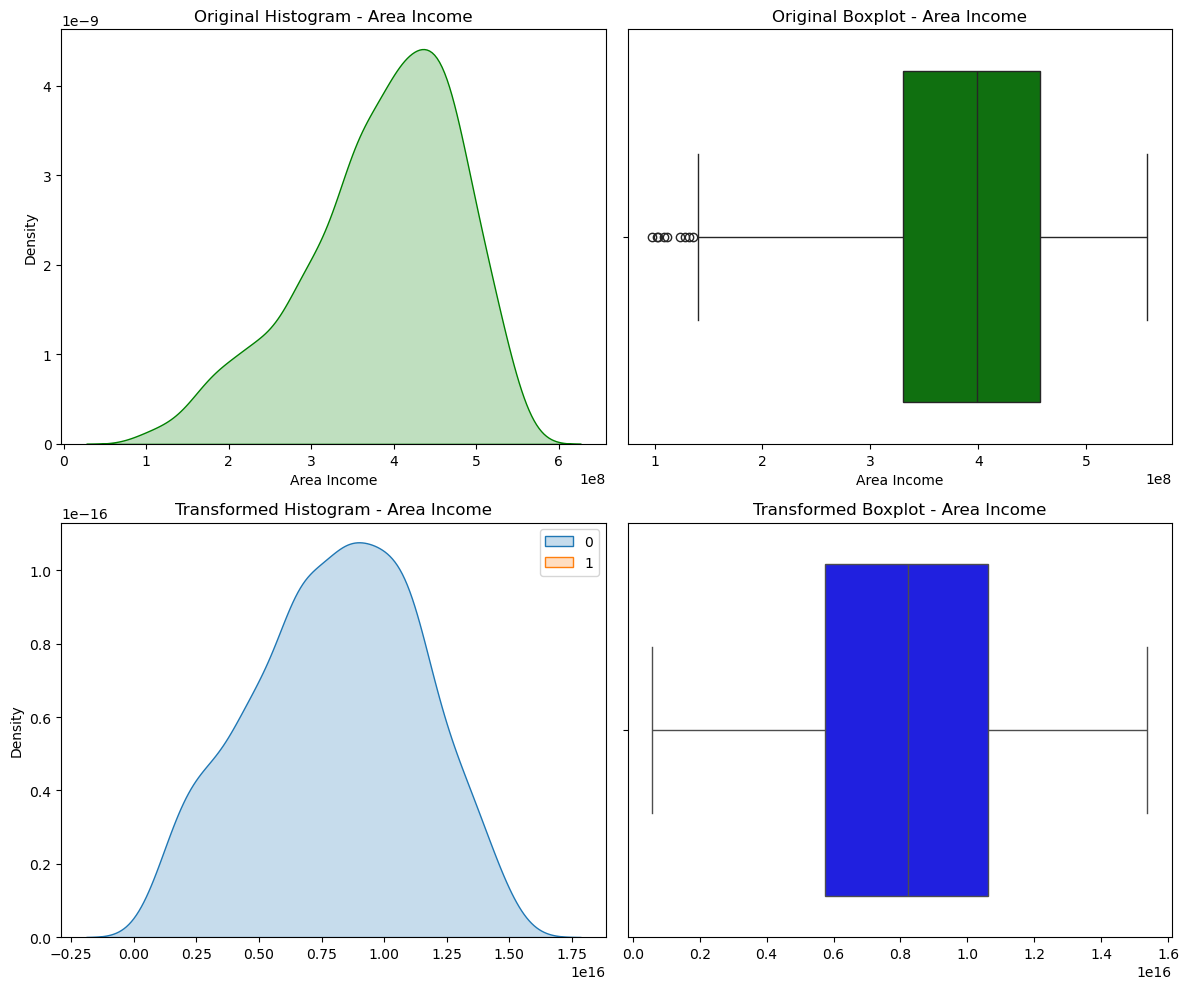

count    9.970000e+02
mean     3.851100e+08
std      9.360014e+07
min      9.797550e+07
25%      3.299745e+08
50%      3.991039e+08
75%      4.569611e+08
max      5.563936e+08
Name: Area Income, dtype: float64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import yeojohnson as yj

col = 'Area Income'

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the original histogram
sns.kdeplot(df_nums[col], color='green', ax=axes[0, 0], fill=True)
axes[0, 0].set_title(f'Original Histogram - {col}')

# Plot the original boxplot
sns.boxplot(df_nums[col], color='green', orient='h', ax=axes[0, 1])
axes[0, 1].set_title(f'Original Boxplot - {col}')

# Plot the transformed histogram
sns.kdeplot(yj(df_nums[col]), color='blue', ax=axes[1, 0], fill=True)
axes[1, 0].set_title(f'Transformed Histogram - {col}')

# Plot the transformed boxplot
sns.boxplot(yj(df_nums[col])[0], color='blue', orient='h', ax=axes[1, 1])
axes[1, 1].set_title(f'Transformed Boxplot - {col}')

# Display the plots
plt.tight_layout()
plt.show()

df_nums[col].describe()

There are outliers on the left side of the distribution; however, they are likely not anomalies. Therefore, handling these outliers using the Yeo-Johnson transformation will be beneficial, as it can effectively stabilize variance and make the data more normally distributed, which is important for many statistical analyses and machine learning algorithms.

In [7]:
def apply_yeojohnson(data, col):
    data[col + 'transformed'] = yj(data[col])[0]
    data = data.drop(columns=col, axis=1)
    return data


In [8]:
df_nums = apply_yeojohnson(df_nums, 'Area Income')
df_OHE = apply_yeojohnson(df_OHE, 'Area Income')
df_label = apply_yeojohnson(df_label, 'Area Income')

## Scaling


In [9]:
# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

def scale_data(scaler, X_train, X_test):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Standardization
X_train_nums_standard, X_test_nums_standard = scale_data(standard_scaler, X_train_nums, X_test_nums)
X_train_OHE_standard, X_test_OHE_standard = scale_data(standard_scaler, X_train_OHE, X_test_OHE)
X_train_label_standard, X_test_label_standard = scale_data(standard_scaler, X_train_label, X_test_label)

# Normalization
X_train_nums_norm, X_test_nums_norm = scale_data(minmax_scaler, X_train_nums, X_test_nums)
X_train_OHE_norm, X_test_OHE_norm = scale_data(minmax_scaler, X_train_OHE, X_test_OHE)
X_train_label_norm, X_test_label_norm = scale_data(minmax_scaler, X_train_label, X_test_label)

# Model Evaluation

In [10]:
# Model Evaluation
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Duration'])

# Function to evaluate models
def evaluate_model(model, x_train, x_test, y_train, y_test):
    start_time = time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    duration = time.time() - start_time
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    return accuracy, precision, recall, f1, duration


## Experiment on df_nums dataset

In [11]:
# List of datasets to test
datasets = {
    'No Scaling': (X_train_nums, X_test_nums),
    'Standardization': (X_train_nums_standard, X_test_nums_standard),
    'Normalization': (X_train_nums_norm, X_test_nums_norm)
}

# Iterate over each dataset and model
for scale_name, (x_train, x_test) in datasets.items():
    for model_name, model in models.items():
        accuracy, precision, recall, f1, duration = evaluate_model(model, x_train, x_test, y_train_nums, y_test_nums)
        results = results._append({
            'Model': f"{model_name} ({scale_name})",
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Duration': duration
        }, ignore_index=True)

In [12]:
df_nums_results = results
df_nums_results

,Model,Accuracy,Precision,Recall,F1 Score,Duration
0,Logistic Regression (No Scaling),0.500000,0.000000,0.000000,0.000000,0.004000
1,K-Nearest Neighbors (No Scaling),0.676667,0.685315,0.653333,0.668942,0.009001
2,Naive Bayes (No Scaling),0.753333,0.811475,0.660000,0.727941,0.001999
3,Decision Tree (No Scaling),0.950000,0.941176,0.960000,0.950495,0.002998
4,Random Forest (No Scaling),0.950000,0.947020,0.953333,0.950166,0.096518
5,Gradient Boosting (No Scaling),0.953333,0.947368,0.960000,0.953642,0.103514
6,AdaBoost (No Scaling),0.953333,0.959459,0.946667,0.953020,0.049004
7,XGBoost (No Scaling),0.960000,0.953947,0.966667,0.960265,1.757053
8,Logistic Regression (Standardization),0.976667,0.993103,0.960000,0.976271,0.002002
9,K-Nearest Neighbors (Standardization),0.963333,0.986014,0.940000,0.962457,0.008000


**Findings:**
1. No Scaling Result:
    - XGBoost give the best result with accuracy score of 0.9600.
2. Standardization Result:
    - While data which had been standardized shows the best results on Logistic Regression with accuracy score of 0.9767.
3. Normalization Result:
    - Meanwhile, data with normalization scaling shows the same result with standardization, with logistic regression and accuracy score of 0.9700, a bit lower than standardization result.

**Important Insights:**
1. Impact of Scaling:
    - The dramatic improvement in Logistic Regression performance (from 0.50 to 0.9767) after scaling demonstrates how crucial preprocessing is for distance-based algorithms.
    - This shows that the original data had significant scale differences between features that were affecting model performance
2. Model Performance:
    - In the non-scaled data, tree-based models (XGBoost, Random Forest, Decision Tree) performed well because they're naturally invariant to scaling
    - After scaling, simpler models like Logistic Regression became competitive or even superior to more complex models, suggesting that:
        - The underlying relationships in the data might be relatively linear
        - We might not need complex ensemble methods for this particular problem
3. Efficiency Considerations:
    - Looking at the Duration column:
        - Logistic Regression and Naive Bayes are consistently fast (≈0.001s)
        - Ensemble methods (Random Forest, Gradient Boosting) take significantly longer (≈0.1s)
        - The performance gain from complex models might not justify the additional computational cost

Given the results, **Standardized Logistic Regression model** will be recommended (for df_nums dataset) because:
- It achieves the highest accuracy (0.9767), Precision (0.9331), Recall (0.9600), and the duration (0.002)
- It's computationally efficient
- It's more interpretable than ensemble methods

In [13]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Penalty type
    'solver': ['liblinear']        # Solver that supports l1 penalty
}

# Initialize Logistic Regression model
logistic = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(X_train_nums_standard, y_train_nums)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Results DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Display the best parameters and score
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Check for overfitting by comparing train and validation scores
train_score_nums = cross_val_score(LogisticRegression(**best_params), X_train_nums_standard, y_train_nums, cv=5).mean()
test_score_nums = grid_search.score(X_test_nums_standard, y_test_nums)

print("Training Score:", train_score_nums)
print("Validation Score:", test_score_nums)

# Display the results DataFrame
results_df[['params', 'mean_test_score', 'rank_test_score']]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.9684172661870504
Training Score: 0.9684172661870504
Validation Score: 0.9766666666666667


,params,mean_test_score,rank_test_score
0,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.946896,10
1,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.958386,9
2,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.964111,8
3,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.967009,7
4,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.968417,1
5,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.968417,1
6,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.968417,1
7,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.968417,1
8,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",0.968417,1
9,"{'C': 100, 'penalty': 'l2', 'solver': 'libline...",0.968417,1


In [14]:
# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_

# Calculate metrics using the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test_nums_standard)

# Calculate metrics
accuracy = accuracy_score(y_test_nums, y_pred)
precision = precision_score(y_test_nums, y_pred, average='binary')
recall = recall_score(y_test_nums, y_pred, average='binary')
f1 = f1_score(y_test_nums, y_pred, average='binary')

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Add duration (if you tracked it during training)
duration = grid_search.refit_time_  # If you want to include the refit time from GridSearchCV
results_df.loc[len(results_df)] = ['Duration (s)', duration]

# Add best hyperparameters to the DataFrame
params_df = pd.DataFrame.from_dict(best_params, orient='index', columns=['Best Value'])
results_df = pd.concat([results_df, params_df], axis=1)

# Display the results DataFrame
results_df

,Metric,Score,Best Value
0,Accuracy,0.976667,NaN
1,Precision,0.993103,NaN
2,Recall,0.960000,NaN
3,F1 Score,0.976271,NaN
4,Duration (s),0.001002,NaN
C,NaN,NaN,1
penalty,NaN,NaN,l1
solver,NaN,NaN,liblinear


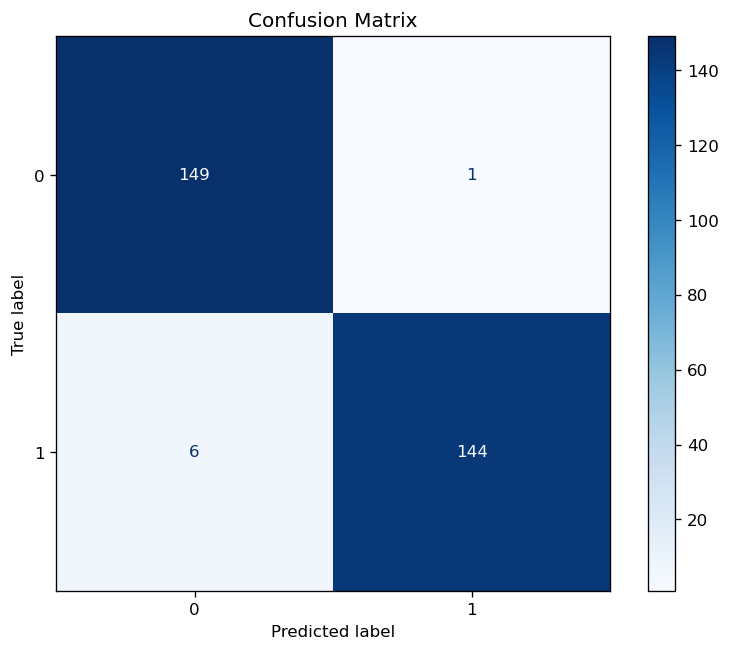

In [15]:
import matplotlib.pyplot as plt

# Predict the test set results
y_pred = grid_search.predict(X_test_nums_standard)

# Compute the confusion matrix
cm = confusion_matrix(y_test_nums, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6), dpi=120)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Confusion Matrix')
plt.show()

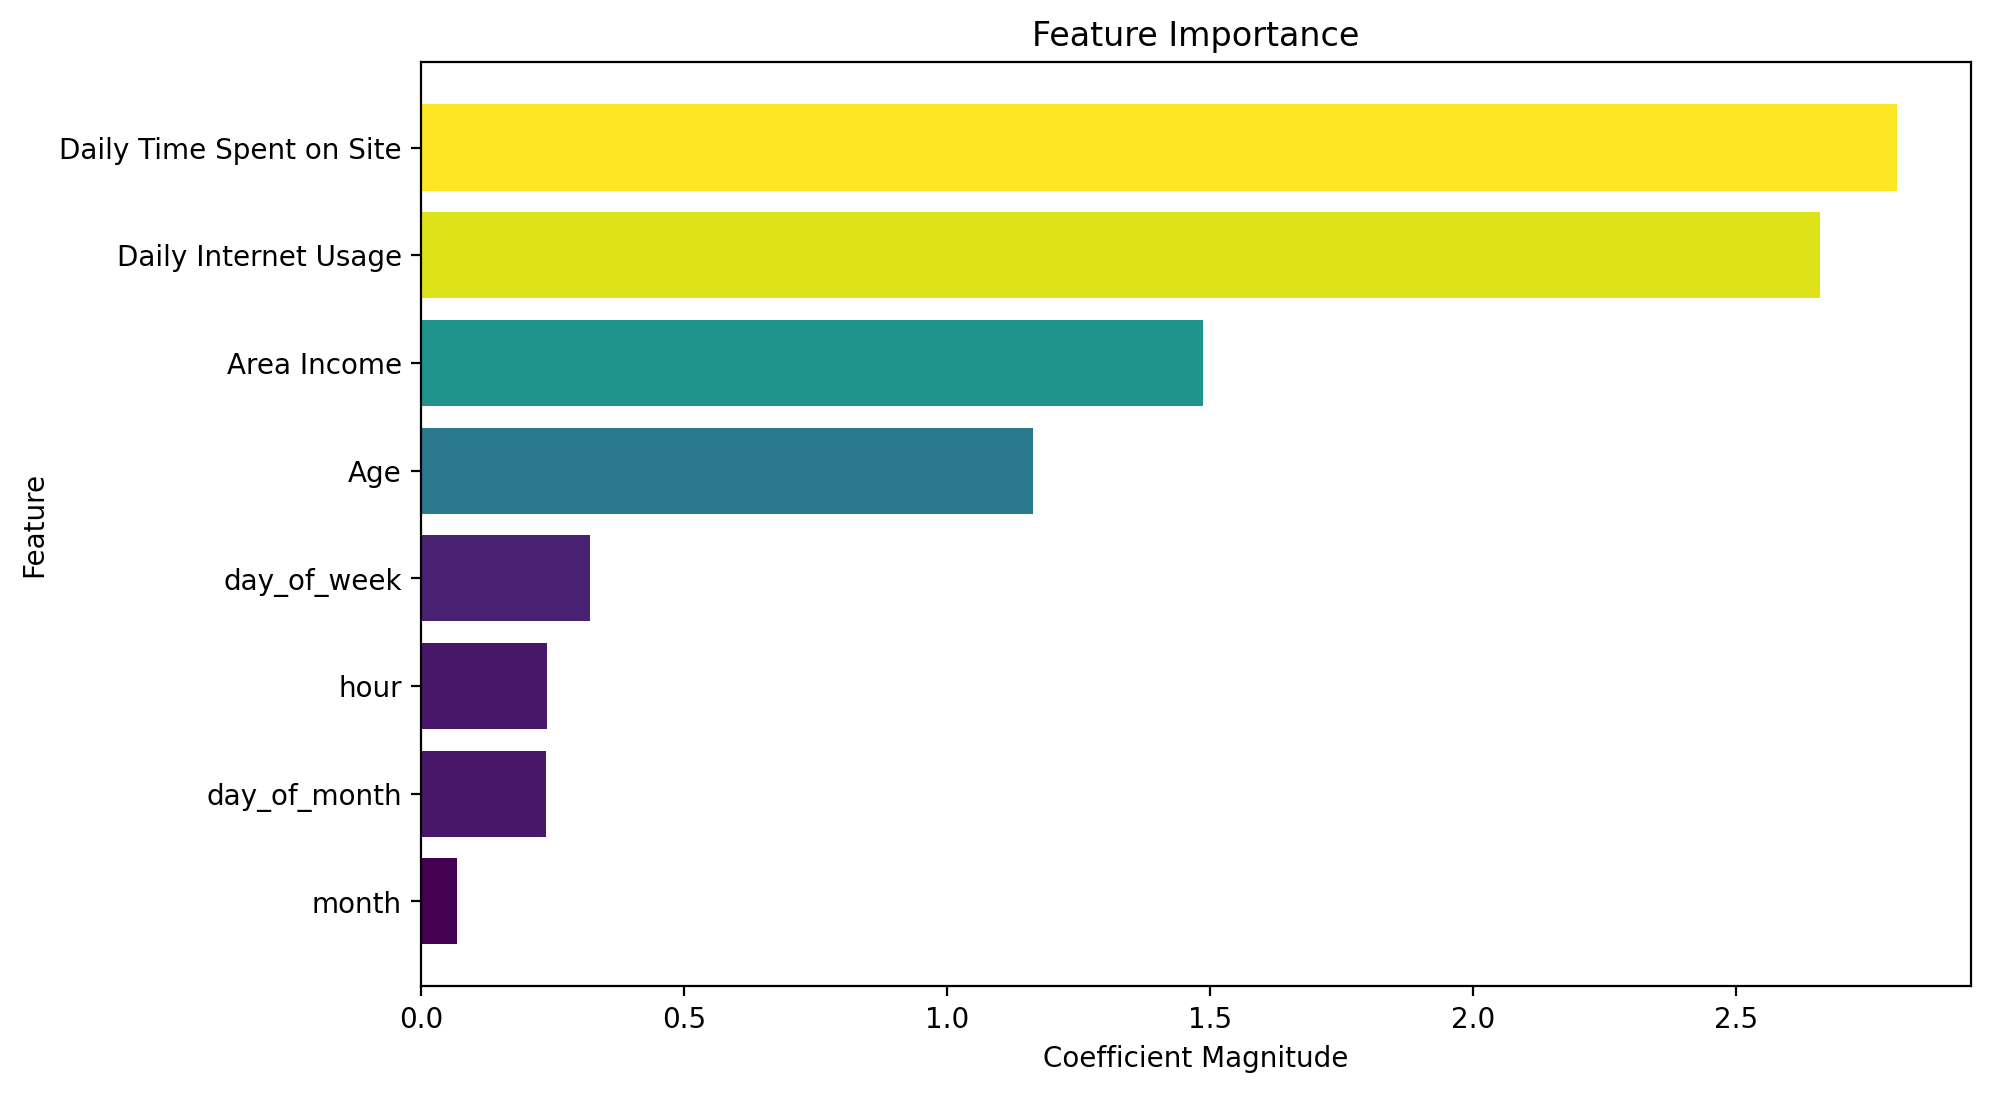

In [16]:
import matplotlib.cm as cm 
# Get the feature names
feature_names = X_train_nums.columns

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Extract feature importance (coefficients) from the standardized model
importance = best_model.coef_[0]

# Create a DataFrame for better handling
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(importance)
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Normalize importance for color mapping
norm = plt.Normalize(importance_df['Importance'].min(), importance_df['Importance'].max())
colors = cm.viridis(norm(importance_df['Importance']))

# Plot feature importance with gradient colors
plt.figure(figsize=(10, 6), dpi=200)
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.title('Feature Importance')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


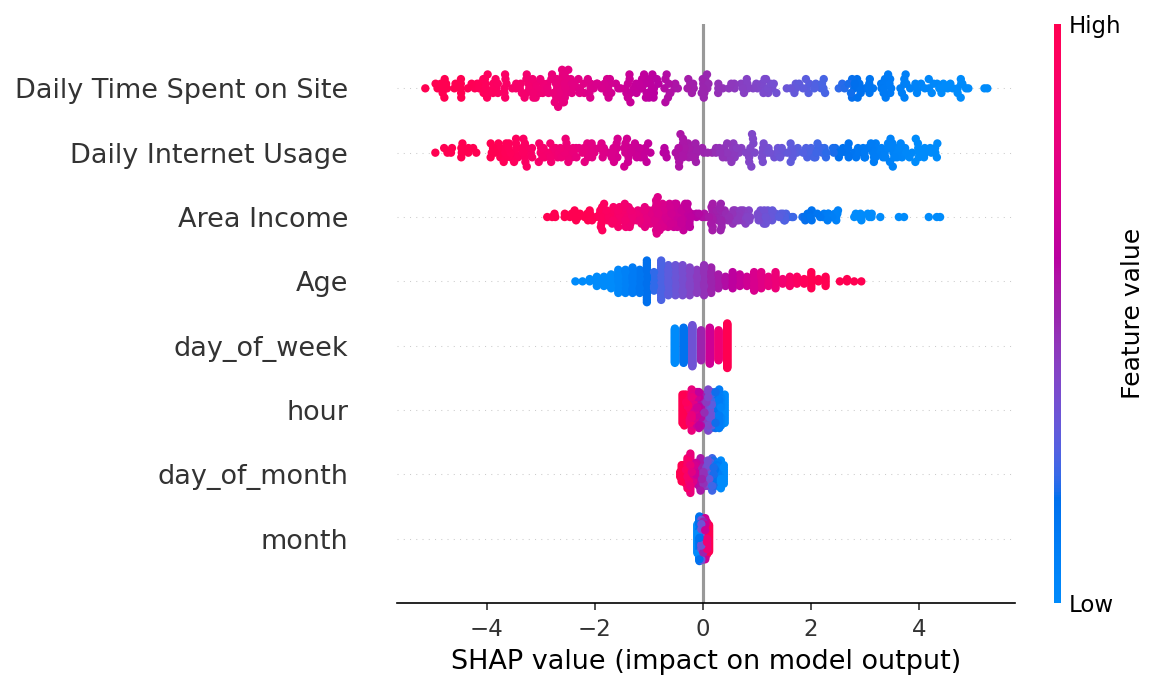

<Figure size 640x480 with 0 Axes>

In [17]:
import shap 

# Initialize the SHAP explainer with the best model
explainer = shap.LinearExplainer(best_model, X_train_nums_standard)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_nums_standard)

# Plot the SHAP summary
plt.figure(figsize=(12, 8), dpi=150)
shap.summary_plot(shap_values, X_test_nums_standard, feature_names=feature_names)
plt.tight_layout()
plt.show()


### Conclusion on df_nums dataset

1. Feature used:
- In the df_nums dataset only use the **numeric** and **datetime** features because categorical features does not associated with the label (based on chi-squared result)

2. Selected Model:
- Based on the experiment using various algorithms and scaling, the best model is Standardization Logistic Regression with hyperparameter tuning C = 1, regularization L1 (Lasso Regression), and solver liblinear. The final result shows:
    - Accuracy: 0.9767
    - Precision: 0.9931
    - Recall: 0.9600
    - F1 Score: 0.9762
    - Duration (s) : 0.001

3. Feature Importance:
- There are 4 features importance to increase engagement on ad.
- Based on the shap value, older people with lower spend time on site & internet and lower income tend to clicked on ad, suggesting company should targetting on middle aged with lower spend time on site & internet. On the opposite, younger users tend to spend time on site & internet longer because they only intend to browsing the site, not interested with the relevant ad.


## Experiment on df_OHE dataset

In [18]:
# Model Evaluation
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Duration'])

# Function to evaluate models
def evaluate_model(model, x_train, x_test, y_train, y_test):
    start_time = time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    duration = time.time() - start_time
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    return accuracy, precision, recall, f1, duration


In [19]:
# List of datasets to test
datasets = {
    'No Scaling': (X_train_OHE_standard, X_test_OHE_standard),
    'Standardization': (X_train_OHE_standard, X_test_OHE_standard),
    'Normalization': (X_train_OHE_standard, X_test_OHE_standard)
}

# Iterate over each dataset and model
for scale_name, (x_train, x_test) in datasets.items():
    for model_name, model in models.items():
        accuracy, precision, recall, f1, duration = evaluate_model(model, x_train, x_test, y_train_nums, y_test_nums)
        results = results._append({
            'Model': f"{model_name} ({scale_name})",
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Duration': duration
        }, ignore_index=True)

In [20]:
df_OHE_results = results
df_OHE_results

,Model,Accuracy,Precision,Recall,F1 Score,Duration
0,Logistic Regression (No Scaling),0.973333,0.986301,0.960000,0.972973,0.003000
1,K-Nearest Neighbors (No Scaling),0.866667,0.904412,0.820000,0.860140,0.116525
2,Naive Bayes (No Scaling),0.953333,0.941558,0.966667,0.953947,0.000000
3,Decision Tree (No Scaling),0.933333,0.922078,0.946667,0.934211,0.003001
4,Random Forest (No Scaling),0.956667,0.947712,0.966667,0.957096,0.105525
5,Gradient Boosting (No Scaling),0.950000,0.941176,0.960000,0.950495,0.121850
6,AdaBoost (No Scaling),0.953333,0.959459,0.946667,0.953020,0.054007
7,XGBoost (No Scaling),0.953333,0.947368,0.960000,0.953642,0.033998
8,Logistic Regression (Standardization),0.973333,0.986301,0.960000,0.972973,0.001999
9,K-Nearest Neighbors (Standardization),0.866667,0.904412,0.820000,0.860140,0.052005


## Experiment on df_label dataset

In [21]:
# Model Evaluation
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Duration'])

# Function to evaluate models
def evaluate_model(model, x_train, x_test, y_train, y_test):
    start_time = time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    duration = time.time() - start_time
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    return accuracy, precision, recall, f1, duration


In [22]:
# List of datasets to test
datasets = {
    'No Scaling': (X_train_label_standard, X_test_label_standard),
    'Standardization': (X_train_label_standard, X_test_label_standard),
    'Normalization': (X_train_label_standard, X_test_label_standard)
}

# Iterate over each dataset and model
for scale_name, (x_train, x_test) in datasets.items():
    for model_name, model in models.items():
        accuracy, precision, recall, f1, duration = evaluate_model(model, x_train, x_test, y_train_nums, y_test_nums)
        results = results._append({
            'Model': f"{model_name} ({scale_name})",
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Duration': duration
        }, ignore_index=True)

In [23]:
df_label_results = results
df_label_results

,Model,Accuracy,Precision,Recall,F1 Score,Duration
0,Decision Tree (No Scaling),0.953333,0.941558,0.966667,0.953947,0.003000
1,Random Forest (No Scaling),0.956667,0.947712,0.966667,0.957096,0.124514
2,Gradient Boosting (No Scaling),0.950000,0.941176,0.960000,0.950495,0.118512
3,AdaBoost (No Scaling),0.953333,0.953333,0.953333,0.953333,0.053511
4,XGBoost (No Scaling),0.950000,0.947020,0.953333,0.950166,0.023995
5,Decision Tree (Standardization),0.953333,0.941558,0.966667,0.953947,0.002002
6,Random Forest (Standardization),0.956667,0.947712,0.966667,0.957096,0.135026
7,Gradient Boosting (Standardization),0.950000,0.941176,0.960000,0.950495,0.118215
8,AdaBoost (Standardization),0.953333,0.953333,0.953333,0.953333,0.050558
9,XGBoost (Standardization),0.950000,0.947020,0.953333,0.950166,0.026509


# Conclusion


1. The best dataset
- We utilized three preprocessed datasets: one containing no categorical features, one handling categorical features using One-Hot Encoding, and another using label encoding.
- The results indicate **no significant difference** among the three datasets, suggesting that **categorical** features** do not significantly** affect the prediction of whether an ad was clicked.

2. The best model
- We conducted experiments with various algorithms and scaling methods applied to the three datasets, and the results consistently showed that **Logistic Regression** achieved the highest performance.
- Other algorithms, such as tree-based methods and ensemble methods, performed slightly lower than Logistic Regression. This suggests that Logistic Regression is more suitable for this dataset due to its simplicity and effectiveness.
- Therefore, the **Standardized Logistic Regression model** applied to the df_nums dataset is identified as the best machine learning model, particularly because Logistic Regression is sensitive to feature scaling, and the Area Income feature exhibits the highest range.